# BPL_TEST2_Batch_design_space - demo

In [31]:
run -i BPL_TEST2_Batch_explore.py

Windows - run FMU pre-compiled JModelica 2.14

Model for bioreactor has been setup. Key commands:
 - par()       - change of parameters and initial values
 - init()      - change initial values only
 - simu()      - simulate and plot
 - newplot()   - make a new plot
 - show()      - show plot from previous simulation
 - disp()      - display parameters and initial values from the last simulation
 - describe()  - describe culture, broth, parameters, variables with values / units

Note that both disp() and describe() takes values from the last simulation

Brief information about a command by help(), eg help(simu)
Key system information is listed with the command system_info()


In [32]:
 plt.rcParams['figure.figsize'] = [30/2.54, 24/2.54]

## Batch evaluation

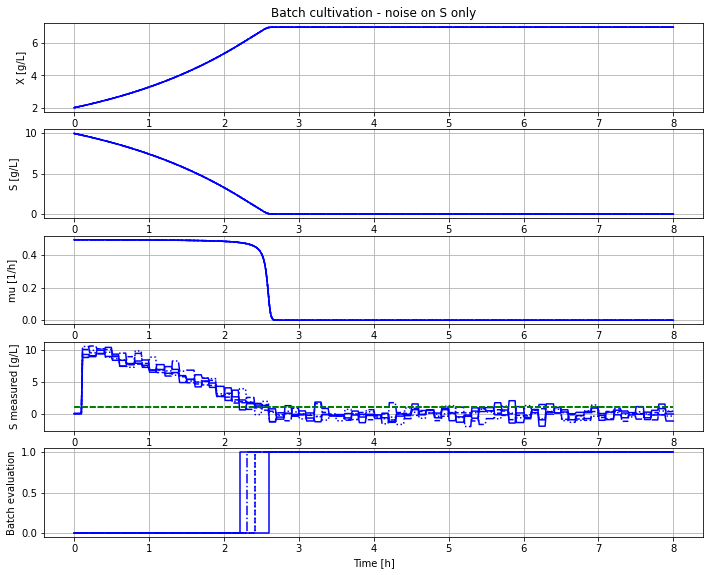

In [33]:
newplot(plotType='TimeSeries_2')
init(VX_0=2, VS_0=10)
par(sigma=0.75)
for value in [1,2,3,4,5]: par(seed=value); simu(8)

## Batch evaluation under process variation - parameter sweep

In [34]:
# Define sweep ranges and storage of final data
nY = 20
nqSmax = 20
Yxs_range = np.linspace(0.3,0.5,nY)
qSmax_range = np.linspace(0.4,0.6,nqSmax)
data = np.zeros([nY,nqSmax,5])

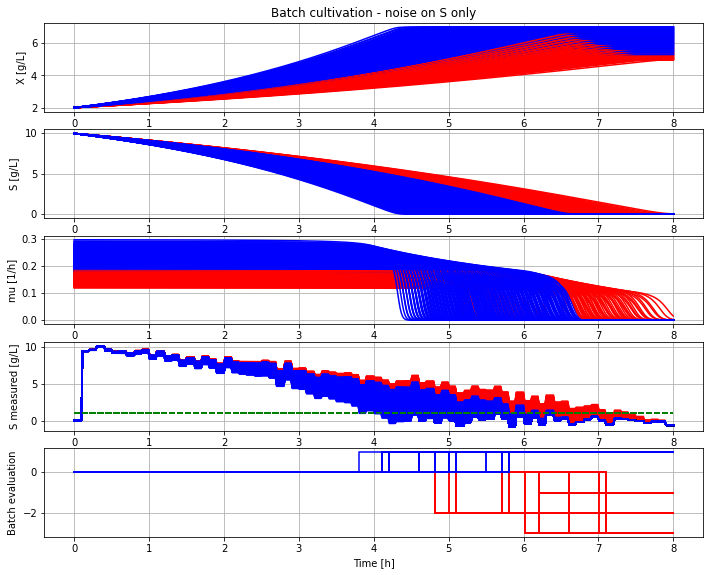

In [37]:
# Run parameter sweep 
newplot(plotType='TimeSeries_2_diagrams')
init(VX_0=2, VS_0=10)
par(sigma=0.4, seed=1)

for j in range(nY):
    for k in range(nqSmax):
        par(Y=Yxs_range[j])
        par(qSmax=qSmax_range[k])
        simu(8)
                       
        # Store final results
        data[j,k,0] = Yxs_range[j]
        data[j,k,1] = qSmax_range[k]
        data[j,k,2] = sim_res['monitor.time_final'][-1]
        data[j,k,3] = sim_res['monitor.X_final'][-1]
        data[j,k,4] = sim_res['monitor.batch_evaluation'][-1]
        
        # Plot simulation results
        if sim_res['monitor.batch_evaluation'][-1] > 0:
            ax1.plot(sim_res['time'], sim_res['bioreactor.c[1]'],'b-')
            ax2.plot(sim_res['time'], sim_res['bioreactor.c[2]'],'b-') 
            ax3.plot(sim_res['time'], sim_res['bioreactor.culture.q[1]'],'b-')
            ax4.plot(sim_res['time'], sim_res['sensor.out.c[2]'],'b-')
            ax4.plot([0, simulationTime], [model.get('monitor.S_min'), model.get('monitor.S_min')],'g--')
            ax5.step(sim_res['time'],sim_res['monitor.batch_evaluation'],where='post',color='b',linestyle='-') 
        else:
            ax1.plot(sim_res['time'], sim_res['bioreactor.c[1]'],'r-')   
            ax2.plot(sim_res['time'], sim_res['bioreactor.c[2]'],'r-')             
            ax3.plot(sim_res['time'], sim_res['bioreactor.culture.q[1]'],'r-')            
            ax4.plot(sim_res['time'], sim_res['sensor.out.c[2]'],'r-')
            ax4.plot([0, simulationTime], [model.get('monitor.S_min'), model.get('monitor.S_min')],'g--') 
            ax5.step(sim_res['time'],sim_res['monitor.batch_evaluation'],where='post',color='r',linestyle='-')
            
plt.show()

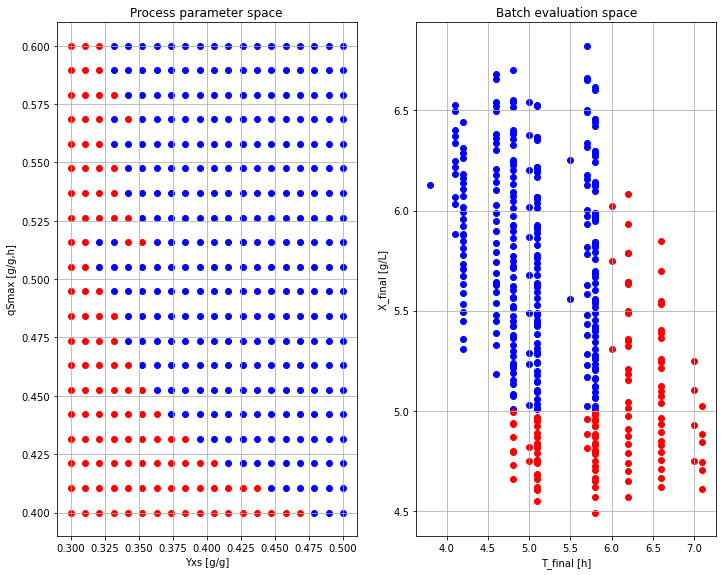

In [38]:
# Show end results
plt.figure()
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

for j in range(nY):
    for k in range(nqSmax):
        if data[j,k,4] > 0: 
            ax1.scatter(data[j,k,0],data[j,k,1],c='b')
        else:
            ax1.scatter(data[j,k,0],data[j,k,1],c='r')           
ax1.grid()
#plt.axis([0, 0.8, 0, 0.8])
ax1.set_ylabel('qSmax [g/g,h]')
ax1.set_xlabel('Yxs [g/g]')
ax1.set_title('Process parameter space')

for j in range(nY):
    for k in range(nqSmax):
        if data[j,k,4] > 0:         
            ax2.scatter(data[j,k,2],data[j,k,3],c='b')
        else:
            ax2.scatter(data[j,k,2],data[j,k,3],c='r')                 
ax2.grid()
#plt.axis([0, 8, 0, 8])
ax2.set_xlabel('T_final [h]')
ax2.set_ylabel('X_final [g/L]')
ax2.set_title('Batch evaluation space')
plt.show()

## Summary

## References

Axelsson J.P. and A. Elsheikh: “An example of sensitivity analysis of a bioprocess using Bioprocess Library for Modelica”, Proceedings MODPROD, Linköping, Sweden 2019, see presentation
[here](https://modprodblog.wordpress.com/modprod-2019/).


## Appendix

In [ ]:
describe('parts')

In [ ]:
describe('MSL')

In [ ]:
system_info()